# L10.1 Clustering Practice
---
이름: 김태산

학과: 자동차공학과

학번: 20143211

---

## 과제 목표: k-means 함수를 직접 구현하고, 이미지에 k-means 알고리즘을 적용하여 색이 줄어든 이미지 출력하기

### 모듈 불러오기
- 사용할 모듈 import 하기

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

### K-means
- K-means 알고리즘을 적용하기 위해 kmeans 함수를 구현한다.
- K-means 알고리즘의 과정은 다음과 같다.
 1. 임의의 k개의 중심점(centroid)을 생성한다.
    - 이번 실습에서는 Forgy 방법을 사용하여 데이터의 점들 중 임의로 k개의 점을 선택한다.
 2. 각각의 점으로부터 가장 가까운 중심점을 찾아 가까운 중심점의 클러스터에 포함시킨다.
    - 가장 가까운 중심점을 찾는 함수인 assign 함수를 구현하였다.
    - assign 함수는 점에서부터 중심점까지의 거리 제곱값을 각각 계산한 후 비교하여 최솟값을 갖는 중심점을 찾아 해당 중심점의 인덱스를 리턴한다.
    - 리턴된 중심점의 인덱스를 assignments에 입력하여 각각의 점에서 가장 가까운 중심점의 인덱스를 저장한다.
  3. 2에서 구한 클러스터의 점들의 평균을 구하여 새로운 중심점을 계산한다.
    - 클러스터에서 각각의 점들의 평균점을 찾는 함수인 newCentroids 함수를 구현하였다.
    - newCentroids 함수는 먼저 list comprehension으로 클러스터의 갯수만큼 빈 리스트를 생성한다.
    - 그리고 assignments로 각 점의 중심점 인덱스을 확인하여 각각의 점을 해당 클러스터에 append한다.
    - 마지막으로 list comprehension을 이용하여 각각의 클러스터에 입력된 점들을 차수별로 평균하여 새로운 중심점의 좌표를 구하고 이를 리턴한다.
    - 중심점을 구할 때는 np.mean 함수를 사용하는데, axis=0이면 열 방향의 평균을, axis=1이면 행 방향의 평균을 계산한다.
    - 따라서 axis=0으로 하면 각각의 점들에서 같은 축에 해당하는 값의 평균을 계산할 수 있다.
    - axis에 값을 입력하지 않으면 전체 값의 평균을 계산한다. 
  4. 클러스터에 변화가 없을 경우 함수를 종료하고 각각의 점들에 가장 가까운 중심점의 인덱스 변수와 중심점을 리턴한다.
    - 3에서 구한 새로운 중심점과 데이터의 점들로 다시 2, 3 과정을 반복하고, 반복 시 이전 epoch의 assignments와 현재 epoch의 assignments가 동일할 경우 클러스터의 변화가 없음을 의미하므로 함수를 종료한다.

In [52]:
def assign(point, centroids, k):
  centroidIdx_for_p = min(range(k), key=lambda i:np.sum((centroids[i]-point) ** 2))
  return centroidIdx_for_p

In [53]:
def newCentroids(assignments, points, k):
  clusters = [[] for _ in range(k)]
  for i, p in zip(assignments, points):
    clusters[i].append(p)
  
  return [np.mean(cluster, axis=0) for cluster in clusters] # if cluster != [] else random.choices(points)

In [54]:
def kmeans(k, points):
  prev_assignments = []
  
  # 1. 임의로 k개의 점을 중심점으로 선택(forgy 방법)
  centroids = random.choices(points, k=k)

  for epoch in range(10):
    # 2. 각 점이 할당될 중심점을 계산
    assignments = [assign(p, centroids, k) for p in points]

    # 3. 새로운 centroid 계산
    centroids = newCentroids(assignments, points, k)

    # 4. 클러스터에 변화가 없을 경우 종료
    if prev_assignments == assignments: break

    prev_assignments = assignments
    
  return assignments, centroids

### 테스트
1. 데이터 생성
 - np.random.randn은 표준 정규분포로부터 난수를 생성한다.
 - 이를 이용하여 (0, 0, 0)을 기준으로 80개의 임의의 점을 생성하고, (10, 10, 10)와 (20, 0, 0)을 기준으로 각각 20개의 임의의 점을 생성한다.
 - 따라서 points에는 3차원의 총 3개의 클러스터를 이루는 점들이 입력된다.

In [65]:
k = 3

points = [np.random.randn(k) for _ in range(80)]
points.extend([np.random.randn(k) + np.array([10, 10, 10]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([20, 0, 0]) for _ in range(20)])
points = np.array(points)

2. kmeans 실행
 - kmeans 함수에 k와 points을 입력하여 중심점 인덱스 변수와 중심점을 구한다.

3. 결과 확인
 - 아래의 출력 결과를 보면, 3개의 클러스터의 중심 위치에 빨강점으로 3개의 중심점이 제대로 표시된 것을 확인할 수 있다.
 - 그러나 이는 kmeans 함수를 여러번 반복하여 얻은 중심점인데, 결과와 같은 중심점을 얻기 전까지 중심점을 구했을 때 클러스터를 잘 표현하지 못하고 local optimum에 빠지는 경우가 다수 발생하였다.
 - 이는 중심점을 초기화하는 과정에서 Forgy 방법을 사용하여 데이터의 점들 중 임의의 점으로 초기화하기 때문에 발생하는 것으로 보인다.
 - 따라서 중심점을 초기화할 때 직접 중심점을 지정하거나, K-means++와 같이 데이터에서 가장 멀리 떨어진 k개의 점으로 초기화하면 이러한 문제점이 훨씬 더 개선될 것이다.
 - 코드에서 fig.gca는 get current axes의 약자로, gca 메서드의 키워드로 projection='3d'를 입력하면 그래프의 축을 3차원으로 그릴 수 있다.
 - scatter 함수에 점들을 입력할 때에는 * zip(*cluster)와 같이 입력한다.
 - *cluster를 통해 인자를 언패킹하여 클러스터 내의 각각의 점을 분리하고 zip 함수로 모든 점의 x 좌표는 x 좌표끼리, y좌표는 y 좌표끼리, z 좌표는 z 좌표끼리 묶어 zip 객체로 저장한다.
 - 그리고 다시 인자 언패킹하여 x, y, z 좌표가 분리되도록 한 후 scatter 함수에 입력하면 3차원 그래프를 그릴 수 있다.

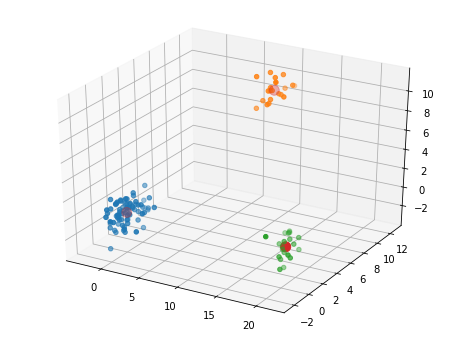

In [73]:
assignments, centroids = kmeans(k, points)

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')

clusters = [[] for _ in range(k)]
for i, p in zip(assignments, points):
  clusters[i].append(p)

for cluster in clusters:
  ax.scatter(*zip(*cluster))

ax.scatter(*zip(*centroids), s=100) # s는 점의 크기를 지정하는 파라미터이다.
plt.show()

### 사진 불러오기
- PIL은 Python Imaging Library로, PIL의 Image 모듈을 사용하면 이미지를 불러와 사이즈를 재조정하거나 회전시키는 등의 다양한 작업을 수행할 수 있다.
- Image.open을 사용하여 사진을 불러오고,  resize 메서드를 사용하여 사진의 사이즈를 조정한다.
- 사진의 넓이를 width = 200으로 지정한 후 height : width = im.height : im.weight의 비례식으로 기존의 사진과 같은 비율로 height를 구한 후 width와 height를 이용하여 사진의 크기를 조정한다.

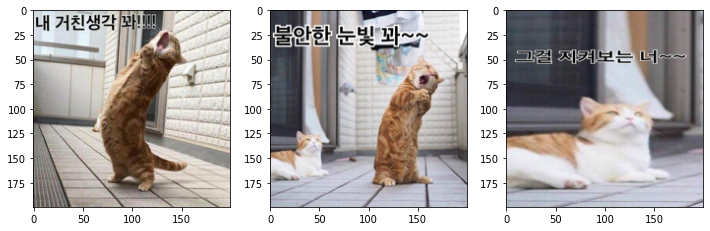

In [97]:
from PIL import Image

plt.figure(figsize=(12,8))

images = []
for i in range(1, 4):
  # 사진 불러오기 & 크기 조절 & 화면에 출력
  im = Image.open(f"/content/drive/My Drive/datasets/kmeans/testImage{i}.jpg")
  width = 200
  height = im.height * width // im.width
  im = im.resize((width, height))
  images.append(im)

  plt.subplot(f"13{i}")
  plt.imshow(im)

plt.show()

### k-means 적용, 결과 확인
- k-means를 적용하기 전에 이미지를 kmeans 함수가 처리할 수 있는 형태로 만들어주어야 한다.
- Image.open으로 이미지를 불러오면 이미지는 RGB 형태의 3차원 픽셀 데이터이므로 reshape 메서드를 사용하여 2차원 데이터로 변환한다.
- 이미지를 변환한 후 kmeans 함수에 입력하여 중심점과 각각의 점에 대한 중심점 인덱스를 구한다.
- for 문에서는 모든 픽셀의 값을 속한 클러스터의 중심점으로 바꾼다.
- 모든 픽셀에 대해서 중심점으로 바꾼 후 이미지를 다시 RGB 형태의 3차원으로 변환하고 이를 출력하면, 아래와 같이 이미지가 k=5개의 색만으로 압축되어 표현된 것을 확인할 수 있다.

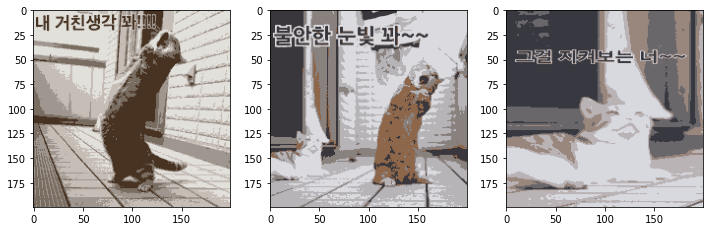

In [98]:
plt.figure(figsize=(12,8))
k = 5

for i in range(3):
  # 데이터 준비 & k-means 알고리즘 적용
  pixels = np.array(images[i]).reshape(-1, 3)
  assignments, centroids = kmeans(k, pixels)

  # 모든 픽셀의 색을 centroid 중 하나로 선택
  for a, p in zip(assignments, range(pixels.shape[0])):
    pixels[p] = centroids[a]

  # 바뀐 그림 출력
  pixels = pixels.reshape(im.height, im.width, 3)
  im_remastered = Image.fromarray(pixels, 'RGB')

  plt.subplot(f"13{i+1}")
  plt.imshow(im_remastered)

plt.show()